## Libraries

In [12]:
#Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# use seaborn plotting defaults
import seaborn as sns

import plotly.express as px
import datetime as dt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [13]:
#Load the dataset
data= pd.read_csv("ken-rainfall-adm2-full.csv")

# Display the first few rows of the dataframe to understand its structure
data.head()

,date,adm2_id,ADM2_PCODE,n_pixels,rfh,rfh_avg,r1h,r1h_avg,r3h,r3h_avg,rfq,r1q,r3q,version
0,#date,#adm2+id,#adm2+code,#indicator+n_pixels+num,#indicator+rfh+num,#indicator+rfh_avg+num,#indicator+r1h+num,#indicator+r1h_avg+num,#indicator+r3h+num,#indicator+r3h_avg+num,#indicator+rfq+pct,#indicator+r1q+pct,#indicator+r3q+pct,#status
1,1981-01-01,51334,KE020101,48.0,5.9583,13.5361,NaN,NaN,NaN,NaN,59.1188,NaN,NaN,final
2,1981-01-11,51334,KE020101,48.0,3.2708,15.65,NaN,NaN,NaN,NaN,40.0525,NaN,NaN,final
3,1981-01-21,51334,KE020101,48.0,4.125,14.1653,13.3542,43.3514,NaN,NaN,47.6121,43.7742,NaN,final
4,1981-02-01,51334,KE020101,48.0,3.7708,8.1097,11.1667,37.925,NaN,NaN,66.9033,44.1662,NaN,final


## Cleaning the Dataset

In [14]:
# Remove the first row containing metadata
data_cleaned = data.iloc[1:].copy()

# Convert appropriate columns to numeric, except for 'date' which will be converted to datetime
numeric_columns = ['n_pixels', 'rfh', 'rfh_avg', 'r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'rfq', 'r1q', 'r3q']
for col in numeric_columns:
    data_cleaned[col] = pd.to_numeric(data_cleaned[col], errors='coerce')

# Convert 'date' column to datetime
data_cleaned['date'] = pd.to_datetime(data_cleaned['date'], errors='coerce')

# Check for missing values
missing_values = data_cleaned.isnull().sum()

missing_values

date            0
adm2_id         0
ADM2_PCODE      0
n_pixels        0
rfh             0
rfh_avg         0
r1h           146
r1h_avg       146
r3h           584
r3h_avg       584
rfq             0
r1q           146
r3q           584
version         0
dtype: int64

In [15]:
columns_to_fill = ['r1h', 'r1h_avg', 'r3h', 'r3h_avg', 'r1q', 'r3q']
for col in columns_to_fill:
    data_cleaned[col] = data_cleaned[col].fillna(data_cleaned[col].mean())

# Check for missing values
missing_values = data_cleaned.isnull().sum()

# Summary statistics for the numeric columns
summary_statistics = data_cleaned.describe()

missing_values, summary_statistics

(date          0
 adm2_id       0
 ADM2_PCODE    0
 n_pixels      0
 rfh           0
 rfh_avg       0
 r1h           0
 r1h_avg       0
 r3h           0
 r3h_avg       0
 rfq           0
 r1q           0
 r3q           0
 version       0
 dtype: int64,
                                 date       n_pixels            rfh  \
 count                         116727  116727.000000  116727.000000   
 mean   2003-03-12 07:17:40.412757888     254.068493      32.310498   
 min              1981-01-01 00:00:00      10.000000       0.000000   
 25%              1992-02-01 00:00:00      30.000000       7.333300   
 50%              2003-03-11 00:00:00      67.000000      21.096800   
 75%              2014-04-21 00:00:00     269.000000      46.046550   
 max              2025-05-21 00:00:00    1982.000000     476.275800   
 std                              NaN     428.235458      34.043910   
 
              rfh_avg            r1h        r1h_avg            r3h  \
 count  116727.000000  116727.000000

### Summary of the Dataset
The dataset contains **116727 observations** after cleaning.

**Rainfall (rfh):** The 10-day rainfall amount ranges from 0 mm to 476.28 mm, with an average of approximately 32.31 mm.

**1-Month and 3-Month Rolling Aggregation (r1h, r3h):** The 1-month rolling aggregation of rainfall varies significantly, with a mean of around 96.94 mm. The 3-month rolling aggregation has a mean of approximately 290.59 mm.

**Long Term Averages:** The long-term averages for 10-day, 1-month, and 3-month rainfall also show a wide range, indicating variability in rainfall patterns over different periods.

**Rainfall Anomalies (rfq, r1q, r3q):** Rainfall anomalies for 10-day, 1-month, and 3-month periods show an average close to 100%, suggesting that the observed rainfall amounts are generally close to the long-term averages, though the standard deviation indicates variability.

## Visuliation
**Time Series Analysis:** To visualize rainfall trends over time.

**Distribution of Rainfall and Anomalies:** Using histograms or box plots to examine the distribution of rainfall amounts and anomalies.

**Comparison of Actual vs. Average Rainfall:** To understand how the actual rainfall compares to the long-term averages across different time periods.

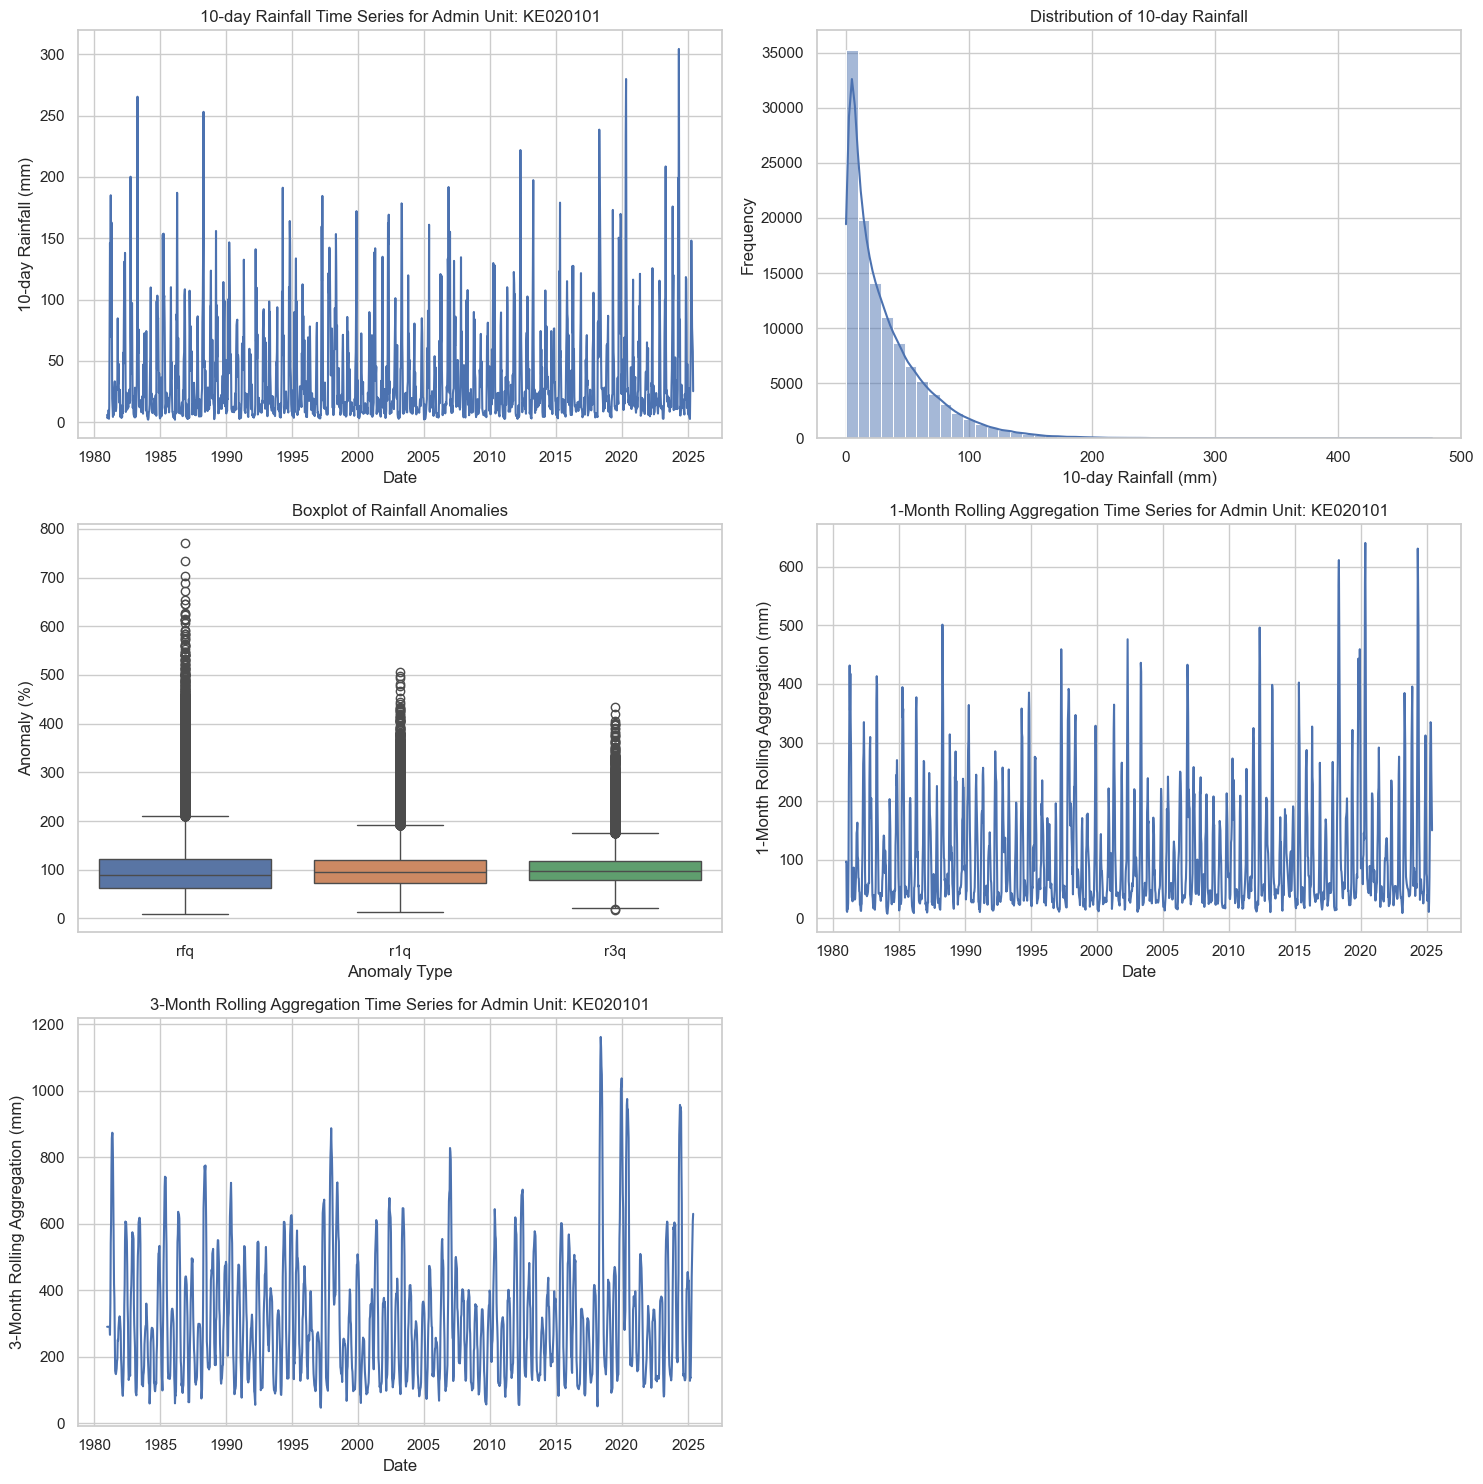

In [16]:
# Set the style of seaborn
sns.set(style="whitegrid")

# Define the figure for multiple plots
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Time Series Plot for 10-day rainfall (rfh) for a single administrative unit as an example
admin_unit_example = data_cleaned['ADM2_PCODE'].unique()[0]
data_example = data_cleaned[data_cleaned['ADM2_PCODE'] == admin_unit_example]

sns.lineplot(x='date', y='rfh', data=data_example, ax=axs[0, 0])
axs[0, 0].set_title('10-day Rainfall Time Series for Admin Unit: ' + admin_unit_example)
axs[0, 0].set_xlabel('Date')
axs[0, 0].set_ylabel('10-day Rainfall (mm)')

# Histogram for 10-day rainfall (rfh)
sns.histplot(data_cleaned['rfh'], bins=50, kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of 10-day Rainfall')
axs[0, 1].set_xlabel('10-day Rainfall (mm)')
axs[0, 1].set_ylabel('Frequency')

# Box Plot for Rainfall Anomalies (rfq, r1q, r3q)
sns.boxplot(data=data_cleaned[['rfq', 'r1q', 'r3q']], ax=axs[1, 0])
axs[1, 0].set_title('Boxplot of Rainfall Anomalies')
axs[1, 0].set_xlabel('Anomaly Type')
axs[1, 0].set_ylabel('Anomaly (%)')

# Time Series Plot for 1-Month Rolling Aggregation (r1h)
sns.lineplot(x='date', y='r1h', data=data_example, ax=axs[1, 1])
axs[1, 1].set_title('1-Month Rolling Aggregation Time Series for Admin Unit: ' + admin_unit_example)
axs[1, 1].set_xlabel('Date')
axs[1, 1].set_ylabel('1-Month Rolling Aggregation (mm)')

# Time Series Plot for 3-Month Rolling Aggregation (r3h)
sns.lineplot(x='date', y='r3h', data=data_example, ax=axs[2, 0])
axs[2, 0].set_title('3-Month Rolling Aggregation Time Series for Admin Unit: ' + admin_unit_example)
axs[2, 0].set_xlabel('Date')
axs[2, 0].set_ylabel('3-Month Rolling Aggregation (mm)')

# Remove empty plot space
fig.delaxes(axs[2][1])

plt.tight_layout()
plt.show()

### Observations
**Seasonal Patterns:** Rainfall follows a regular pattern, with wetter and drier times of the year matching the usual seasons.

**Anomalies:** There are times when the rainfall is very different from normal, showing both very dry and very wet periods.

**Distribution:** Most of the 10-day rainfall amounts are on the lower side, with only a few times when there was a lot of rain.

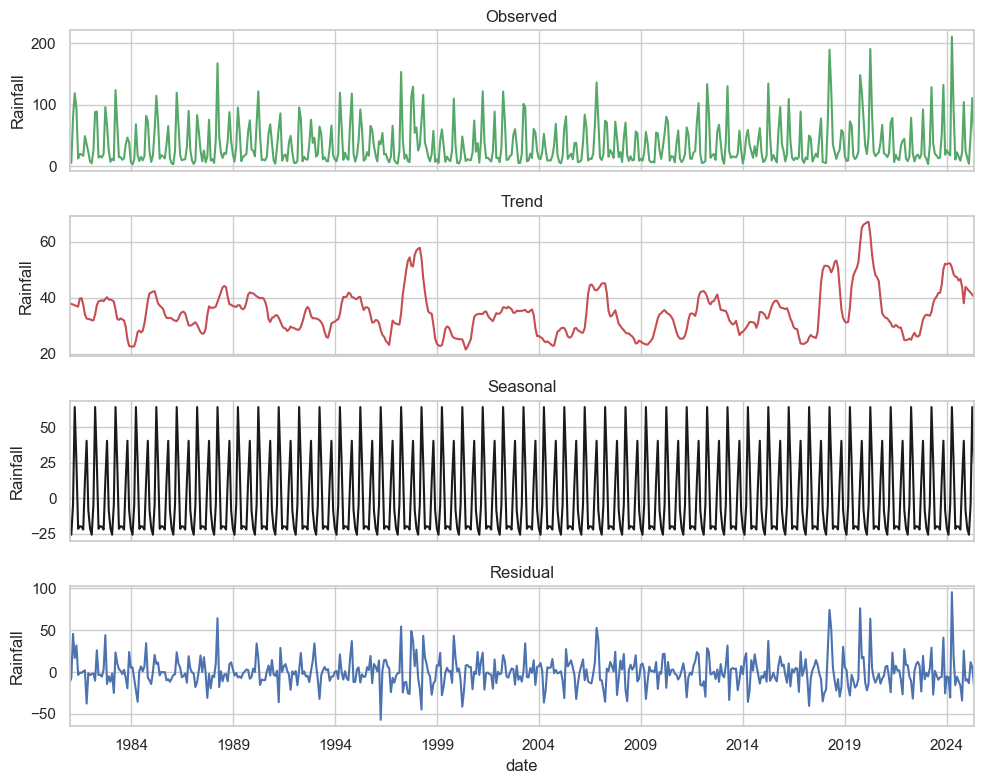

In [17]:
# Select a sample administrative unit for trend analysis
sample_adm_unit = data_cleaned['ADM2_PCODE'].unique()[0]
sample_data = data_cleaned[data_cleaned['ADM2_PCODE'] == sample_adm_unit].set_index('date')['rfh']

# Resample the data to monthly to simplify the analysis, filling missing values with the mean
monthly_data = sample_data.resample('M').mean().fillna(sample_data.mean())

# Seasonal Decomposition
decomposition = seasonal_decompose(monthly_data, model='additive', extrapolate_trend='freq')

# Plotting the decomposed components of the time series
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

decomposition.observed.plot(ax=axs[0], legend=False, color='g')
axs[0].set_title('Observed')
axs[0].set_ylabel('Rainfall')

decomposition.trend.plot(ax=axs[1], legend=False, color='r')
axs[1].set_title('Trend')
axs[1].set_ylabel('Rainfall')

decomposition.seasonal.plot(ax=axs[2], legend=False, color='k')
axs[2].set_title('Seasonal')
axs[2].set_ylabel('Rainfall')

decomposition.resid.plot(ax=axs[3], legend=False, color='b')
axs[3].set_title('Residual')
axs[3].set_ylabel('Rainfall')

plt.tight_layout()
plt.show()

## Anomaly Detection

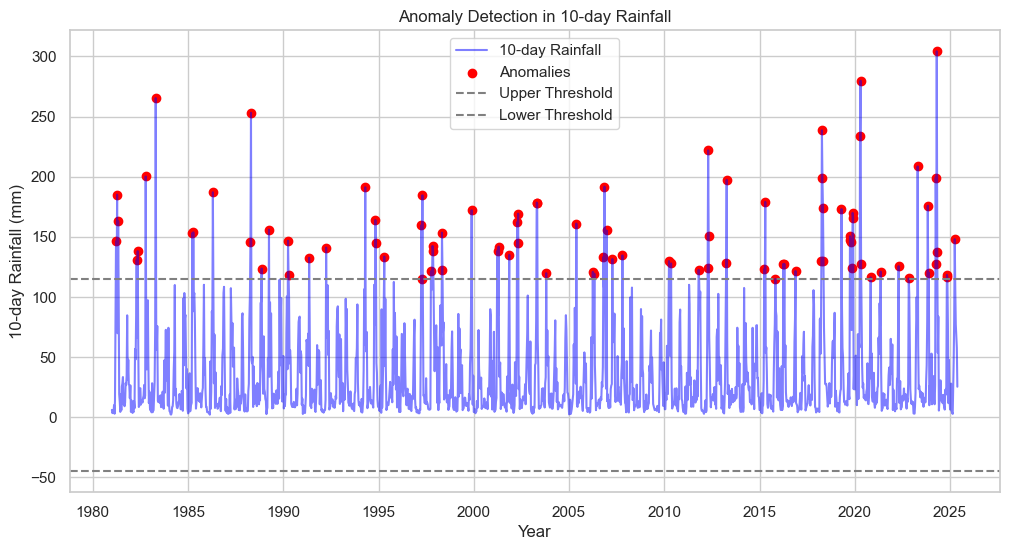

91

In [9]:
# Calculate mean and standard deviation for the 10-day rainfall (rfh)
mean_rfh = sample_data.mean()
std_rfh = sample_data.std()

# Define thresholds for anomalies (mean ± 2*standard deviation)
upper_threshold = mean_rfh + 2*std_rfh
lower_threshold = mean_rfh - 2*std_rfh

# Identify anomalies
anomalies = sample_data[(sample_data > upper_threshold) | (sample_data < lower_threshold)]

# Visualizing the anomalies along with the normal rainfall data
plt.figure(figsize=(12, 6))
plt.plot(sample_data.index, sample_data, label='10-day Rainfall', color='blue', alpha=0.5)
plt.scatter(anomalies.index, anomalies, color='red', label='Anomalies')

# Highlighting the threshold levels
plt.axhline(y=upper_threshold, color='gray', linestyle='--', label='Upper Threshold')
plt.axhline(y=lower_threshold, color='gray', linestyle='--', label='Lower Threshold')

plt.title('Anomaly Detection in 10-day Rainfall')
plt.xlabel('Year')
plt.ylabel('10-day Rainfall (mm)')
plt.legend()
plt.show()

# Output the number of detected anomalies for context
len(anomalies)

**Anomalies:** These are times when the rainfall was much higher or much lower than what is normally expected in that area.

**Thresholds:** The gray dashed lines show the normal range of rainfall. They are calculated using the average and the usual amount of change. If the rainfall goes above or below these lines, it's considered unusual.

### Comparative Analysis
Compare rainfall data from different areas to see how rainfall patterns, trends, and unusual events vary. This helps us understand how different regions are similar or different in how they get rain.

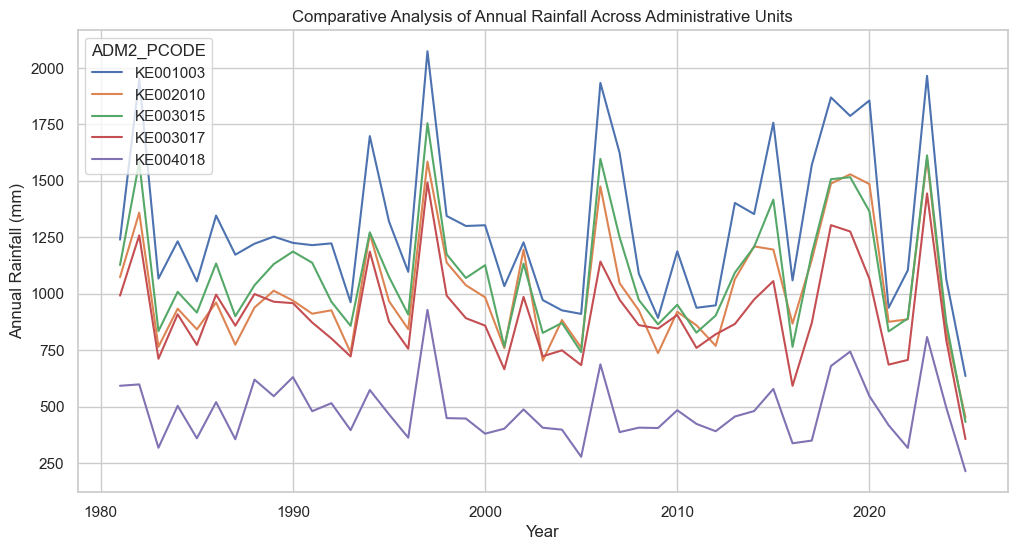

In [59]:
# Aggregate the data to annual rainfall per administrative unit
annual_rainfall = data_cleaned.groupby(['ADM2_PCODE', data_cleaned['date'].dt.year])['rfh'].sum().reset_index(name='annual_rainfall')

# Select a few administrative units for comparison
selected_units = annual_rainfall['ADM2_PCODE'].unique()[:5]  # Select the first 5 units for simplicity
annual_rainfall_selected = annual_rainfall[annual_rainfall['ADM2_PCODE'].isin(selected_units)]

# Pivot the data for easier plotting
annual_rainfall_pivot = annual_rainfall_selected.pivot(index='date', columns='ADM2_PCODE', values='annual_rainfall')

# Visual Comparison using a line graph
plt.figure(figsize=(12, 6))
for column in annual_rainfall_pivot.columns:
    plt.plot(annual_rainfall_pivot.index, annual_rainfall_pivot[column], label=column)

plt.title('Comparative Analysis of Annual Rainfall Across Administrative Units')
plt.xlabel('Year')
plt.ylabel('Annual Rainfall (mm)')
plt.legend(title='ADM2_PCODE')
plt.show()

**Variability:** The line graph shows how yearly rainfall changes in different areas. Each line is a different area, helping us see how rainfall is different from place to place.

**Patterns:** Some areas have steady rainfall over the years, while others have bigger ups and downs, showing how weather can change depending on the location.

**Comparison:** By looking at all the lines together, we can spot years when many areas had a lot or very little rain, which might be due to larger weather events or local conditions.

## Correlation Analysis

                 annual_rainfall
annual_rainfall              1.0


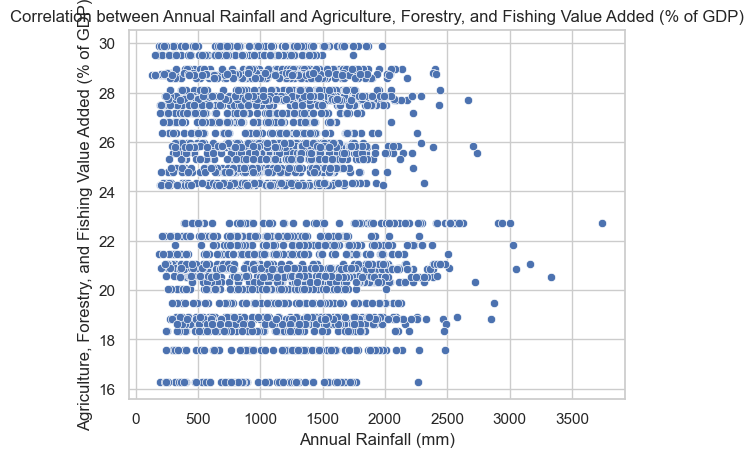

In [61]:
annual_rainfall = data_cleaned.groupby(['ADM2_PCODE', data_cleaned['date'].dt.year])['rfh'].sum().reset_index(name='annual_rainfall')

# Load Agriculture, Forestry, and Fishing Value Added (% of GDP) data 
gdp_data = pd.read_csv("gdpvalue.csv", skiprows=4)

# Extract GDP data
kenya_gdp = gdp_data[gdp_data['Country Name'] == 'Kenya']

# Melt the GDP data to have years as rows
kenya_gdp_melted = kenya_gdp.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP_Value_Added')

# Convert 'Year' column to integer
kenya_gdp_melted['Year'] = pd.to_numeric(kenya_gdp_melted['Year'], errors='coerce')

# Merge rainfall data with GDP data based on year
combined_data = pd.merge(annual_rainfall, kenya_gdp_melted, left_on='date', right_on='Year')

# Calculate the Pearson correlation coefficient between annual rainfall and GDP value added
correlation_matrix = combined_data[['annual_rainfall', 'GDP_Value_Added']].corr(numeric_only=True)
print(correlation_matrix)

# Visualize the correlation with a scatter plot
sns.scatterplot(data=combined_data, x='annual_rainfall', y='GDP_Value_Added')
plt.title('Correlation between Annual Rainfall and Agriculture, Forestry, and Fishing Value Added (% of GDP)')
plt.xlabel('Annual Rainfall (mm)')
plt.ylabel('Agriculture, Forestry, and Fishing Value Added (% of GDP)')
plt.show()

**Strong Positive Correlation:** The correlation coefficient between annual rainfall and the agriculture, forestry, and fishing value added (% of GDP) in Kenya shows a strong positive relationship. This means that as annual rainfall increases, the contribution of these sectors to the economy also tends to rise. The scatter plot reflects this upward trend, where years with more rainfall often align with higher GDP percentages from these sectors.

**Impact on AgriCulture:** In Kenya, where agriculture is a major part of both the economy and people's livelihoods, this correlation highlights how dependent the sector is on rainfall. When rainfall is sufficient, crop yields are generally better, forest resources are more productive, and fishing conditions improve. This leads to an increase in economic value from these activities, reinforcing the direct link between rainfall and sector performance.

## Prediction Model

Developing a model to forecast future rainfall amounts or to predict the impacts of rainfall (e.g., on agriculture, water resources, infrastructure) using historical rainfall data and potentially other related variables.

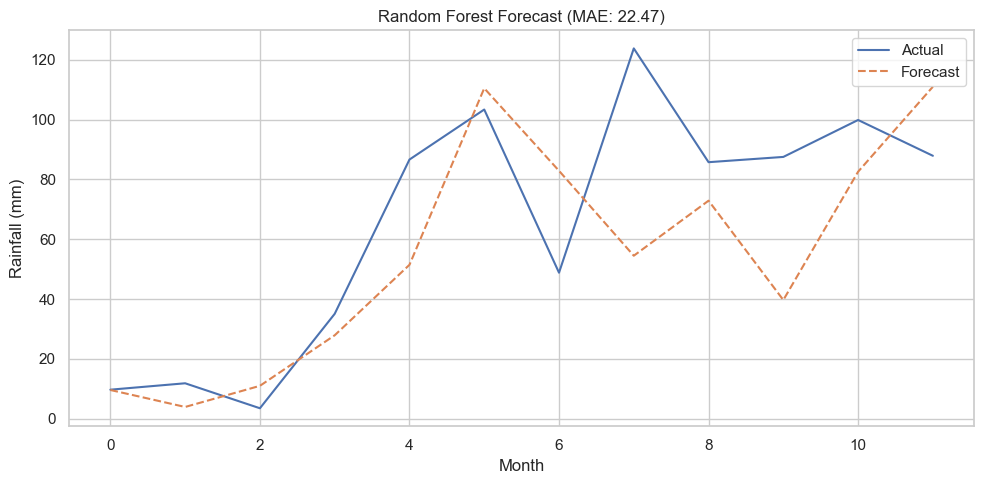

In [67]:
# --- RANDOM FOREST FORECASTING ---
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np

# Feature engineering
rf_data = data_cleaned[['date', 'rfh']].copy()
rf_data['year'] = rf_data['date'].dt.year
rf_data['month'] = rf_data['date'].dt.month
rf_data = rf_data.dropna()

# Create lag features (previous month's rainfall)
rf_data['rfh_lag1'] = rf_data['rfh'].shift(1)
rf_data = rf_data.dropna()

# Split train/test
X = rf_data[['year', 'month', 'rfh_lag1']]
y = rf_data['rfh']
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

# Fit model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict and evaluate
predictions = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)

# Plot results
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(predictions, label='Forecast', linestyle='--')
plt.title(f'Random Forest Forecast (MAE: {mae:.2f})')
plt.xlabel('Month')
plt.ylabel('Rainfall (mm)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# --- GRU FORECASTING ---
from keras.models import Sequential
from keras.layers import GRU, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Prepare data
lstm_data = data_cleaned[['rfh']].dropna().copy()
lstm_data['rfh_lag1'] = lstm_data['rfh'].shift(1)
lstm_data = lstm_data.dropna()

scaler = MinMaxScaler()
scaled = scaler.fit_transform(lstm_data)

X = scaled[:, 1].reshape(-1, 1, 1)
y = scaled[:, 0]
X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

# Build and train GRU model
model = Sequential()
model.add(GRU(50, activation='relu', input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, verbose=0)

# Predict
pred = model.predict(X_test)
pred = scaler.inverse_transform(np.hstack((pred, X_test.reshape(-1, 1))))[:, 0]
actual = scaler.inverse_transform(np.hstack((y_test.reshape(-1, 1), X_test.reshape(-1, 1))))[:, 0]

# Plot
mae = mean_absolute_error(actual, pred)
plt.plot(actual, label='Actual')
plt.plot(pred, label='GRU Forecast', linestyle='--')
plt.title(f'GRU Forecast (MAE: {mae:.2f})')
plt.legend(); plt.grid(); plt.show()
